In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import *
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/waste management.csv')


In [ ]:
df.head()

,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
0,3,0.198716,0.016588,81.011339,0
1,1,0.005522,0.512093,86.707232,0
2,3,0.815461,0.226496,91.324055,0
3,3,0.706857,0.645173,51.134240,0
4,1,0.729007,0.174366,50.151629,0


In [ ]:
df.tail()

,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
95,1,0.320780,0.697016,96.119056,0
96,1,0.186519,0.702484,90.535064,0
97,3,0.040775,0.359491,19.579113,0
98,1,0.590893,0.293592,6.936130,0
99,1,0.677564,0.809361,10.077800,1


In [ ]:
print(df.isnull().sum())

waste_type              0
material_composition    0
recycling_potential     0
toxicity_level          0
management_strategy     0
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   waste_type            100 non-null    int64  
 1   material_composition  100 non-null    float64
 2   recycling_potential   100 non-null    float64
 3   toxicity_level        100 non-null    float64
 4   management_strategy   100 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 4.0 KB
None


In [ ]:
df.describe()

,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.980000,0.477581,0.529666,47.812564,0.130000
std,0.803779,0.288436,0.296389,28.515740,0.337998
min,1.000000,0.005522,0.005062,1.439349,0.000000
25%,1.000000,0.239081,0.263387,23.975350,0.000000
50%,2.000000,0.491624,0.569185,50.723933,0.000000
75%,3.000000,0.729157,0.783609,69.747237,0.000000
max,3.000000,0.985650,0.990054,97.585208,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df= df.dropna()

In [ ]:
X = df[['waste_type',	'material_composition',	'recycling_potential',	'toxicity_level',	'management_strategy']]
Y = df['management_strategy']


In [ ]:
X

,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
0,3,0.198716,0.016588,81.011339,0
1,1,0.005522,0.512093,86.707232,0
2,3,0.815461,0.226496,91.324055,0
3,3,0.706857,0.645173,51.134240,0
4,1,0.729007,0.174366,50.151629,0
...,...,...,...,...,...
95,1,0.320780,0.697016,96.119056,0
96,1,0.186519,0.702484,90.535064,0
97,3,0.040775,0.359491,19.579113,0
98,1,0.590893,0.293592,6.936130,0


In [ ]:
Y

,management_strategy
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,0


In [ ]:

X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
X_train

,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
55,3,0.818015,0.973011,55.435405,0
88,2,0.728216,0.097176,57.547418,0
26,1,0.427541,0.897110,21.582103,0
42,3,0.808120,0.224269,96.264841,0
69,1,0.962447,0.940459,49.161588,1
...,...,...,...,...,...
60,2,0.222108,0.502637,75.784611,0
71,2,0.497249,0.914864,17.320187,0
14,2,0.325183,0.659984,3.594227,0
92,1,0.535775,0.518330,54.561679,0


In [ ]:
Y_train

,management_strategy
55,0
88,0
26,0
42,0
69,1
...,...
60,0
71,0
14,0
92,0


In [ ]:
model = SVC(kernel = 'rbf', C=1.0,gamma= 'scale')
model.fit(X_train, Y_train)

SVC()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


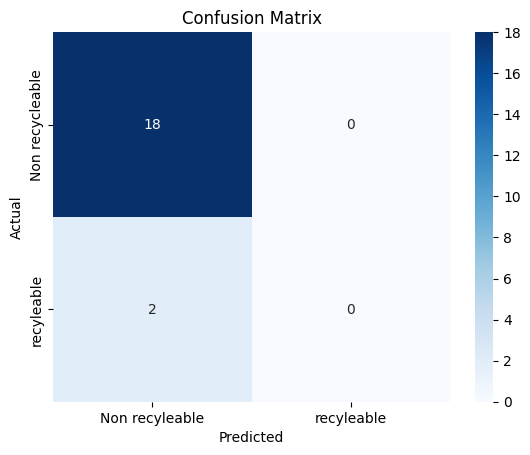

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues',
            xticklabels=['Non recyleable', 'recyleable'],
            yticklabels=['Non recycleable', 'recyleable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

print(classification_report(Y_test, Y_pred,target_names=['non recyleable', 'recyleable']))

                precision    recall  f1-score   support

non recyleable       0.90      1.00      0.95        18
    recyleable       0.00      0.00      0.00         2

      accuracy                           0.90        20
     macro avg       0.45      0.50      0.47        20
  weighted avg       0.81      0.90      0.85        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
